<a href="https://colab.research.google.com/github/rekonreagan/Final-Year-Project/blob/main/LinearRegression2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('drive/My Drive/Colab Notebooks/wfp_food_prices_uga.csv',encoding='ISO-8859-1')
df

date      admin1               admin2            market  \
0           #date  #adm1+name           #adm2+name  #loc+market+name   
1      2006-01-15       Busia          Samia-bugwe             Busia   
2      2006-01-15     Kampala      Central Kampala             Owino   
3      2006-01-15     Kampala      Central Kampala             Owino   
4      2006-01-15        Lira    Lira Municipality              Lira   
...           ...         ...                  ...               ...   
20291  2023-08-15      Tororo  Tororo Municipality            Tororo   
20292  2023-08-15      Tororo  Tororo Municipality            Tororo   
20293  2023-08-15      Tororo  Tororo Municipality            Tororo   
20294  2023-08-15      Tororo  Tororo Municipality            Tororo   
20295  2023-08-15      Tororo  Tororo Municipality            Tororo   

       latitude  longitude            category        commodity        unit  \
0      #geo+lat   #geo+lon          #item+type       #item+name  #item+unit   
1         0.467      34.09  cereals and tubers            Maize          KG   
2      0.322805  32.574841  cereals and tubers            Maize          KG   
3      0.322805  32.574841  cereals and tubers             Rice          KG   
4         2.235  32.909722  cereals and tubers            Maize          KG   
...         ...        ...                 ...              ...         ...   
20291   0.69433  34.179499  cereals and tubers      Maize flour          KG   
20292   0.69433  34.179499  cereals and tubers           Millet          KG   
20293   0.69433  34.179499  cereals and tubers          Sorghum          KG   
20294   0.69433  34.179499        oil and fats  Oil (vegetable)           L   
20295   0.69433  34.179499     pulses and nuts            Beans          KG   

              priceflag         pricetype   currency   price    usdprice  
0      #item+price+flag  #item+price+type  #currency  #value  #value+usd  
1                actual         Wholesale        UGX   298.4      0.1641  
2                actual         Wholesale        UGX  345.42        0.19  
3                actual         Wholesale        UGX  1013.4      0.5573  
4                actual         Wholesale        UGX  247.76      0.1362  
...                 ...               ...        ...     ...         ...  
20291          forecast            Retail        UGX     0.0         0.0  
20292          forecast            Retail        UGX     0.0         0.0  
20293          forecast            Retail        UGX     0.0         0.0  
20294          forecast            Retail        UGX     0.0         0.0  
20295          forecast            Retail        UGX     0.0         0.0  

[20296 rows x 14 columns]

In [ ]:
description = df.describe()
print(description)

              date   admin1           admin2 market  latitude  longitude  \
count        20296    20296            20296  20296     20296      20296   
unique         213       38               41     44        44         44   
top     2022-12-15  Kampala  Central Kampala  Owino  0.322805  32.574841   
freq           828     2190             2190   2190      2190       2190   

                  category commodity   unit priceflag pricetype currency  \
count                20296     20296  20296     20296     20296    20296   
unique                   9        39      6         3         3        2   
top     cereals and tubers     Beans     KG    actual    Retail      UGX   
freq                 11442      2524  16310     16239     18705    20295   

        price usdprice  
count   20296    20296  
unique   3873     7197  
top       0.0      0.0  
freq     4056     4056  


In [ ]:
df.isnull().sum()

date         0
admin1       0
admin2       0
market       0
latitude     0
longitude    0
category     0
commodity    0
unit         0
priceflag    0
pricetype    0
currency     0
price        0
usdprice     0
dtype: int64

In [ ]:
# Explanatory data analysis
# the first 5 rows of the dataset
df.head()

date      admin1             admin2            market  latitude  \
0       #date  #adm1+name         #adm2+name  #loc+market+name  #geo+lat   
1  2006-01-15       Busia        Samia-bugwe             Busia     0.467   
2  2006-01-15     Kampala    Central Kampala             Owino  0.322805   
3  2006-01-15     Kampala    Central Kampala             Owino  0.322805   
4  2006-01-15        Lira  Lira Municipality              Lira     2.235   

   longitude            category   commodity        unit         priceflag  \
0   #geo+lon          #item+type  #item+name  #item+unit  #item+price+flag   
1      34.09  cereals and tubers       Maize          KG            actual   
2  32.574841  cereals and tubers       Maize          KG            actual   
3  32.574841  cereals and tubers        Rice          KG            actual   
4  32.909722  cereals and tubers       Maize          KG            actual   

          pricetype   currency   price    usdprice  
0  #item+price+type  #currency  #value  #value+usd  
1         Wholesale        UGX   298.4      0.1641  
2         Wholesale        UGX  345.42        0.19  
3         Wholesale        UGX  1013.4      0.5573  
4         Wholesale        UGX  247.76      0.1362

In [ ]:
# The last 5 rows of dataset
df.tail()

date  admin1               admin2  market latitude  longitude  \
20291  2023-08-15  Tororo  Tororo Municipality  Tororo  0.69433  34.179499   
20292  2023-08-15  Tororo  Tororo Municipality  Tororo  0.69433  34.179499   
20293  2023-08-15  Tororo  Tororo Municipality  Tororo  0.69433  34.179499   
20294  2023-08-15  Tororo  Tororo Municipality  Tororo  0.69433  34.179499   
20295  2023-08-15  Tororo  Tororo Municipality  Tororo  0.69433  34.179499   

                 category        commodity unit priceflag pricetype currency  \
20291  cereals and tubers      Maize flour   KG  forecast    Retail      UGX   
20292  cereals and tubers           Millet   KG  forecast    Retail      UGX   
20293  cereals and tubers          Sorghum   KG  forecast    Retail      UGX   
20294        oil and fats  Oil (vegetable)    L  forecast    Retail      UGX   
20295     pulses and nuts            Beans   KG  forecast    Retail      UGX   

      price usdprice  
20291   0.0      0.0  
20292   0.0      0.0  
20293   0.0      0.0  
20294   0.0      0.0  
20295   0.0      0.0

In [ ]:
# Total rows and columns 
df.shape

(20296, 14)

In [ ]:
# detailed information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20296 entries, 0 to 20295
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       20296 non-null  object
 1   admin1     20296 non-null  object
 2   admin2     20296 non-null  object
 3   market     20296 non-null  object
 4   latitude   20296 non-null  object
 5   longitude  20296 non-null  object
 6   category   20296 non-null  object
 7   commodity  20296 non-null  object
 8   unit       20296 non-null  object
 9   priceflag  20296 non-null  object
 10  pricetype  20296 non-null  object
 11  currency   20296 non-null  object
 12  price      20296 non-null  object
 13  usdprice   20296 non-null  object
dtypes: object(14)
memory usage: 2.2+ MB


In [ ]:
# descriptive analysis
df.describe()

date   admin1           admin2 market  latitude  longitude  \
count        20296    20296            20296  20296     20296      20296   
unique         213       38               41     44        44         44   
top     2022-12-15  Kampala  Central Kampala  Owino  0.322805  32.574841   
freq           828     2190             2190   2190      2190       2190   

                  category commodity   unit priceflag pricetype currency  \
count                20296     20296  20296     20296     20296    20296   
unique                   9        39      6         3         3        2   
top     cereals and tubers     Beans     KG    actual    Retail      UGX   
freq                 11442      2524  16310     16239     18705    20295   

        price usdprice  
count   20296    20296  
unique   3873     7197  
top       0.0      0.0  
freq     4056     4056

In [ ]:
# since market is equivalent to its location(latitude and longitude), drop it
# columns: admin1, admin2, unit, price, currency and usdprice doesn't affect the price, drop it
df = df.drop(['admin1', 'admin2','market','unit', 'priceflag', 'currency','usdprice'], axis=1)

In [ ]:
# columns were successfully dropped
df

date  latitude  longitude            category        commodity  \
0           #date  #geo+lat   #geo+lon          #item+type       #item+name   
1      2006-01-15     0.467      34.09  cereals and tubers            Maize   
2      2006-01-15  0.322805  32.574841  cereals and tubers            Maize   
3      2006-01-15  0.322805  32.574841  cereals and tubers             Rice   
4      2006-01-15     2.235  32.909722  cereals and tubers            Maize   
...           ...       ...        ...                 ...              ...   
20291  2023-08-15   0.69433  34.179499  cereals and tubers      Maize flour   
20292  2023-08-15   0.69433  34.179499  cereals and tubers           Millet   
20293  2023-08-15   0.69433  34.179499  cereals and tubers          Sorghum   
20294  2023-08-15   0.69433  34.179499        oil and fats  Oil (vegetable)   
20295  2023-08-15   0.69433  34.179499     pulses and nuts            Beans   

              pricetype   price  
0      #item+price+type  #value  
1             Wholesale   298.4  
2             Wholesale  345.42  
3             Wholesale  1013.4  
4             Wholesale  247.76  
...                 ...     ...  
20291            Retail     0.0  
20292            Retail     0.0  
20293            Retail     0.0  
20294            Retail     0.0  
20295            Retail     0.0  

[20296 rows x 7 columns]

In [ ]:
# row at index 0; is meaningless, drop it
df = df.drop(0)

In [ ]:
# the drop; successful
df

date  latitude  longitude            category        commodity  \
1      2006-01-15     0.467      34.09  cereals and tubers            Maize   
2      2006-01-15  0.322805  32.574841  cereals and tubers            Maize   
3      2006-01-15  0.322805  32.574841  cereals and tubers             Rice   
4      2006-01-15     2.235  32.909722  cereals and tubers            Maize   
5      2006-02-15     0.467      34.09  cereals and tubers            Maize   
...           ...       ...        ...                 ...              ...   
20291  2023-08-15   0.69433  34.179499  cereals and tubers      Maize flour   
20292  2023-08-15   0.69433  34.179499  cereals and tubers           Millet   
20293  2023-08-15   0.69433  34.179499  cereals and tubers          Sorghum   
20294  2023-08-15   0.69433  34.179499        oil and fats  Oil (vegetable)   
20295  2023-08-15   0.69433  34.179499     pulses and nuts            Beans   

       pricetype   price  
1      Wholesale   298.4  
2      Wholesale  345.42  
3      Wholesale  1013.4  
4      Wholesale  247.76  
5      Wholesale  296.59  
...          ...     ...  
20291     Retail     0.0  
20292     Retail     0.0  
20293     Retail     0.0  
20294     Retail     0.0  
20295     Retail     0.0  

[20295 rows x 7 columns]

In [ ]:
# dropping a range of rows containing forecast price(0.0); from it's start to it's end
df = df.drop(df.index[16242:20297])

In [ ]:
# dropping a range of rows containing forecast price(0.0); from it's start to it's end
df = df.drop(df.index[16000:16242])

In [ ]:
# drop was successful
df.tail()

date  latitude  longitude            category        commodity  \
15996  2023-01-15   0.35661    32.7523        oil and fats  Oil (vegetable)   
15997  2023-01-15   0.35661    32.7523     pulses and nuts            Beans   
15998  2023-01-15  1.791367  34.598369  cereals and tubers    Maize (white)   
15999  2023-01-15  1.791367  34.598369  cereals and tubers      Maize flour   
16000  2023-01-15  1.791367  34.598369  cereals and tubers          Sorghum   

      pricetype   price  
15996    Retail  9250.0  
15997    Retail  3775.0  
15998    Retail  1475.0  
15999    Retail  3075.0  
16000    Retail  1350.0

In [ ]:
# checking the type of prices in the dataset
# its made up of wholesale and retail prices
df['pricetype'].value_counts()

Retail       14545
Wholesale     1455
Name: pricetype, dtype: int64

In [ ]:
# dividing the dataset into two; wholesale price only and retail price only
wholesale_df = df[df['pricetype']=='Wholesale'].reset_index(drop=True)
retail_df = df[df['pricetype']=='Retail'].reset_index(drop=True)

In [ ]:
# wholesale price only
wholesale_df

date           latitude           longitude            category  \
0     2006-01-15              0.467               34.09  cereals and tubers   
1     2006-01-15           0.322805           32.574841  cereals and tubers   
2     2006-01-15           0.322805           32.574841  cereals and tubers   
3     2006-01-15              2.235           32.909722  cereals and tubers   
4     2006-02-15              0.467               34.09  cereals and tubers   
...          ...                ...                 ...                 ...   
1450  2022-05-15           0.322805           32.574841  cereals and tubers   
1451  2022-05-15           0.322805           32.574841     pulses and nuts   
1452  2022-05-15              2.235           32.909722  cereals and tubers   
1453  2022-05-15              2.235           32.909722     pulses and nuts   
1454  2022-05-15  1.690000057220459  31.709999084472656  cereals and tubers   

     commodity  pricetype    price  
0        Maize  Wholesale    298.4  
1        Maize  Wholesale   345.42  
2         Rice  Wholesale   1013.4  
3        Maize  Wholesale   247.76  
4        Maize  Wholesale   296.59  
...        ...        ...      ...  
1450      Rice  Wholesale  3296.23  
1451     Beans  Wholesale  2694.75  
1452     Maize  Wholesale  1190.64  
1453     Beans  Wholesale  2499.95  
1454     Maize  Wholesale  1199.21  

[1455 rows x 7 columns]

In [ ]:
# dropping pricetype column
wholesale_df=wholesale_df.drop(columns=['pricetype'])

In [ ]:
# drop successful
wholesale_df

date           latitude           longitude            category  \
0     2006-01-15              0.467               34.09  cereals and tubers   
1     2006-01-15           0.322805           32.574841  cereals and tubers   
2     2006-01-15           0.322805           32.574841  cereals and tubers   
3     2006-01-15              2.235           32.909722  cereals and tubers   
4     2006-02-15              0.467               34.09  cereals and tubers   
...          ...                ...                 ...                 ...   
1450  2022-05-15           0.322805           32.574841  cereals and tubers   
1451  2022-05-15           0.322805           32.574841     pulses and nuts   
1452  2022-05-15              2.235           32.909722  cereals and tubers   
1453  2022-05-15              2.235           32.909722     pulses and nuts   
1454  2022-05-15  1.690000057220459  31.709999084472656  cereals and tubers   

     commodity    price  
0        Maize    298.4  
1        Maize   345.42  
2         Rice   1013.4  
3        Maize   247.76  
4        Maize   296.59  
...        ...      ...  
1450      Rice  3296.23  
1451     Beans  2694.75  
1452     Maize  1190.64  
1453     Beans  2499.95  
1454     Maize  1199.21  

[1455 rows x 6 columns]

In [ ]:
# checking contents of category column in wholesale_df
wholesale_df['category'].value_counts()

cereals and tubers       951
pulses and nuts          309
vegetables and fruits    195
Name: category, dtype: int64

In [ ]:
# dataset containing whole price for only cereals and tubers
cereal_tuber_wholesale_df= wholesale_df[wholesale_df['category']== 'cereals and tubers'].reset_index(drop=True)

In [ ]:
# whole price for cereals and tubers only
cereal_tuber_wholesale_df

date           latitude           longitude            category  \
0    2006-01-15              0.467               34.09  cereals and tubers   
1    2006-01-15           0.322805           32.574841  cereals and tubers   
2    2006-01-15           0.322805           32.574841  cereals and tubers   
3    2006-01-15              2.235           32.909722  cereals and tubers   
4    2006-02-15              0.467               34.09  cereals and tubers   
..          ...                ...                 ...                 ...   
946  2022-05-15              -1.25  29.989999771118164  cereals and tubers   
947  2022-05-15           0.322805           32.574841  cereals and tubers   
948  2022-05-15           0.322805           32.574841  cereals and tubers   
949  2022-05-15              2.235           32.909722  cereals and tubers   
950  2022-05-15  1.690000057220459  31.709999084472656  cereals and tubers   

    commodity    price  
0       Maize    298.4  
1       Maize   345.42  
2        Rice   1013.4  
3       Maize   247.76  
4       Maize   296.59  
..        ...      ...  
946     Maize  1365.58  
947     Maize  1248.98  
948      Rice  3296.23  
949     Maize  1190.64  
950     Maize  1199.21  

[951 rows x 6 columns]

In [ ]:
# dropping category column
cereal_tuber_wholesale_df=cereal_tuber_wholesale_df.drop(columns='category')

In [ ]:
# drop successful
cereal_tuber_wholesale_df

date           latitude           longitude commodity    price
0    2006-01-15              0.467               34.09     Maize    298.4
1    2006-01-15           0.322805           32.574841     Maize   345.42
2    2006-01-15           0.322805           32.574841      Rice   1013.4
3    2006-01-15              2.235           32.909722     Maize   247.76
4    2006-02-15              0.467               34.09     Maize   296.59
..          ...                ...                 ...       ...      ...
946  2022-05-15              -1.25  29.989999771118164     Maize  1365.58
947  2022-05-15           0.322805           32.574841     Maize  1248.98
948  2022-05-15           0.322805           32.574841      Rice  3296.23
949  2022-05-15              2.235           32.909722     Maize  1190.64
950  2022-05-15  1.690000057220459  31.709999084472656     Maize  1199.21

[951 rows x 5 columns]

In [ ]:
# checking the data types of all the columns
cereal_tuber_wholesale_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 951 entries, 0 to 950
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       951 non-null    object
 1   latitude   951 non-null    object
 2   longitude  951 non-null    object
 3   commodity  951 non-null    object
 4   price      951 non-null    object
dtypes: object(5)
memory usage: 37.3+ KB


In [ ]:
# converting columns(latitude, longitude and price)from data type object to float
cereal_tuber_wholesale_df[['latitude', 'longitude', 'price']] = cereal_tuber_wholesale_df[['latitude', 'longitude', 'price']].astype(float)

In [ ]:
# converting date column from data type object to date_time
cereal_tuber_wholesale_df['date'] = pd.to_datetime(cereal_tuber_wholesale_df['date'])

# Convert datetime column to Unix timestamps
cereal_tuber_wholesale_df['date'] = cereal_tuber_wholesale_df['date'].apply(lambda x: pd.Timestamp(x).timestamp())

# Convert timestamps to dtype float
cereal_tuber_wholesale_df['date'] = cereal_tuber_wholesale_df['date'].astype(float)

In [ ]:
# checking the success of the conversion
cereal_tuber_wholesale_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 951 entries, 0 to 950
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       951 non-null    float64
 1   latitude   951 non-null    float64
 2   longitude  951 non-null    float64
 3   commodity  951 non-null    object 
 4   price      951 non-null    float64
dtypes: float64(4), object(1)
memory usage: 37.3+ KB


In [ ]:
#converting commodity from object datatype to dummies which are suitable for machine learning algorithms
dummies = pd.get_dummies(cereal_tuber_wholesale_df.commodity)

#Putting each commodity in its column
cereal_tuber_wholesale_df_dummies = pd.concat([cereal_tuber_wholesale_df, dummies], axis='columns')
cereal_tuber_wholesale_df_dummies.head()

date  latitude  longitude commodity    price  Cassava flour  Maize  \
0  1.137283e+09  0.467000  34.090000     Maize   298.40              0      1   
1  1.137283e+09  0.322805  32.574841     Maize   345.42              0      1   
2  1.137283e+09  0.322805  32.574841      Rice  1013.40              0      0   
3  1.137283e+09  2.235000  32.909722     Maize   247.76              0      1   
4  1.139962e+09  0.467000  34.090000     Maize   296.59              0      1   

   Rice  
0     0  
1     0  
2     1  
3     0  
4     0

In [ ]:
#dropping columns(cassava flour and commodity):
#because of multi-collinearnity and datatype being object respectively
df_clean = cereal_tuber_wholesale_df_dummies.drop(['commodity', 'Cassava flour'], axis=1)
df_clean.head()

date  latitude  longitude    price  Maize  Rice
0  1.137283e+09  0.467000  34.090000   298.40      1     0
1  1.137283e+09  0.322805  32.574841   345.42      1     0
2  1.137283e+09  0.322805  32.574841  1013.40      0     1
3  1.137283e+09  2.235000  32.909722   247.76      1     0
4  1.139962e+09  0.467000  34.090000   296.59      1     0

In [ ]:
df_clean

date  latitude  longitude    price  Maize  Rice
0    1.137283e+09  0.467000  34.090000   298.40      1     0
1    1.137283e+09  0.322805  32.574841   345.42      1     0
2    1.137283e+09  0.322805  32.574841  1013.40      0     1
3    1.137283e+09  2.235000  32.909722   247.76      1     0
4    1.139962e+09  0.467000  34.090000   296.59      1     0
..            ...       ...        ...      ...    ...   ...
946  1.652573e+09 -1.250000  29.990000  1365.58      1     0
947  1.652573e+09  0.322805  32.574841  1248.98      1     0
948  1.652573e+09  0.322805  32.574841  3296.23      0     1
949  1.652573e+09  2.235000  32.909722  1190.64      1     0
950  1.652573e+09  1.690000  31.709999  1199.21      1     0

[951 rows x 6 columns]

In [ ]:
#Creating features and label datasets
X=df_clean[['date','latitude','longitude','Maize','Rice']]
y = df_clean['price']

In [ ]:
# Splitting the dataset into training and test
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# training the model
from sklearn.linear_model import LinearRegression
OLS = LinearRegression()
OLS.fit(X_train, y_train)

LinearRegression()

In [ ]:
# predictions made by the model
y_pred_LR = OLS.predict(X_test)
performance = pd.DataFrame({"Actual Price":y_test, "Forecasted Price":y_pred_LR})
performance.head()

Actual Price  Forecasted Price
199       1402.67       2183.485219
420        658.24        628.131681
694        776.45       1108.237500
750        648.28       1004.383873
507        610.99        751.260849

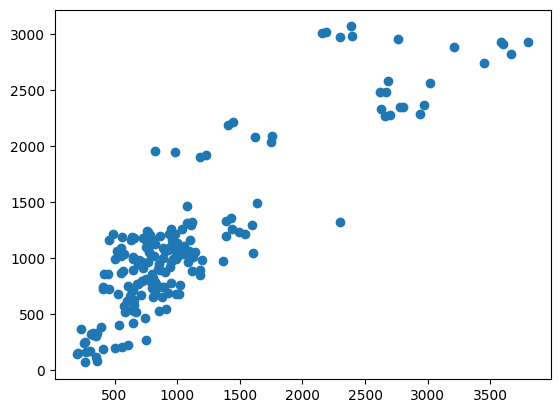

In [ ]:
plt.scatter(y_test,y_pred_LR)

In [ ]:
#Evaluation metrics
from sklearn import metrics

In [ ]:
metrics.mean_absolute_error(y_test,y_pred_LR)

272.99497275663356

In [ ]:
metrics.mean_squared_error(y_test,y_pred_LR)

127087.65465498985

In [ ]:
np.sqrt(metrics.mean_absolute_error(y_test,y_pred_LR))

16.522559509852993

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283839 sha256=1b22fc72d016ebc5e0a27f0731f3aaeb14bef73611fa2badc4b64dfd72a241c6
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
import lime
import lime.lime_tabular

Create the explainer

In [ ]:
# LIME has one explainer for all the models
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns.values.tolist(),
                                                  class_names=['price'], verbose=True, mode='regression')

In [ ]:
j = 5
exp = explainer.explain_instance(X_test.values[j], OLS.predict, num_features=5)

Intercept 2417.9106570596496
Prediction_local [846.34998296]
Right: 885.6216599227491


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
# Show the predictions
exp.show_in_notebook(show_table=True)

In [ ]:
exp.as_list()

[('Rice <= 0.00', -1351.9972757414737),
 ('0.00 < Maize <= 1.00', -472.1015825042941),
 ('1409400000.00 < date <= 1521072000.00', 194.21163527625018),
 ('32.57 < longitude <= 32.91', 58.480686561501244),
 ('0.32 < latitude <= 2.23', -0.15413769156818624)]

In [ ]:
# Choose the 10th instance and use it to predict the results
j = 10
exp = explainer.explain_instance(X_test.values[j], OLS.predict, num_features=5)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Intercept 2714.402279890249
Prediction_local [149.79288617]
Right: 385.61146600450866


In [ ]:
# Show the predictions
exp.show_in_notebook(show_table=True)

In [ ]:
exp.as_list()

[('Rice <= 0.00', -1348.9737108728332),
 ('date <= 1300147200.00', -604.2082090889434),
 ('0.00 < Maize <= 1.00', -469.2218510752334),
 ('longitude <= 32.57', -151.36235407481703),
 ('latitude <= 0.32', 9.15673138941335)]

In [ ]:
# Choose the 15th instance and use it to predict the results
j = 150
exp = explainer.explain_instance(X_test.values[j], OLS.predict, num_features=5)

Intercept 2314.8888864119363
Prediction_local [1140.01637956]
Right: 993.7810643887287


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
# Show the predictions
exp.show_in_notebook(show_table=True)

In [ ]:
exp.as_list()

[('Rice <= 0.00', -1356.2323100473009),
 ('date > 1521072000.00', 588.7547978942343),
 ('0.00 < Maize <= 1.00', -462.9293822989392),
 ('32.57 < longitude <= 32.91', 65.57995506354312),
 ('0.32 < latitude <= 2.23', -10.045567468158186)]



```
# This is formatted as code
```

** **bold text***ELI5***

In [ ]:
!pip install shap


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 15.1 MB/s eta 0:00:00


In [ ]:
import shap


In [ ]:
# Assuming X_test is your test data
explainer = shap.Explainer(OLS.predict, X_train)
shap_values = explainer(X_test)

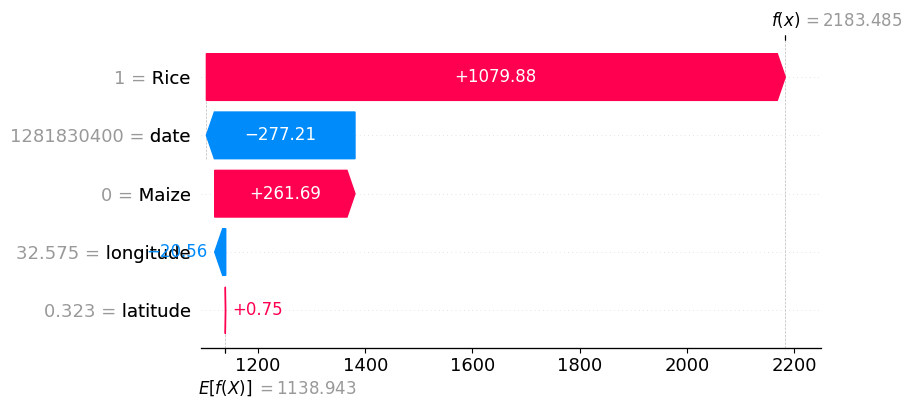

In [ ]:
# Visualize the SHAP values
shap.plots.waterfall(shap_values[0])

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


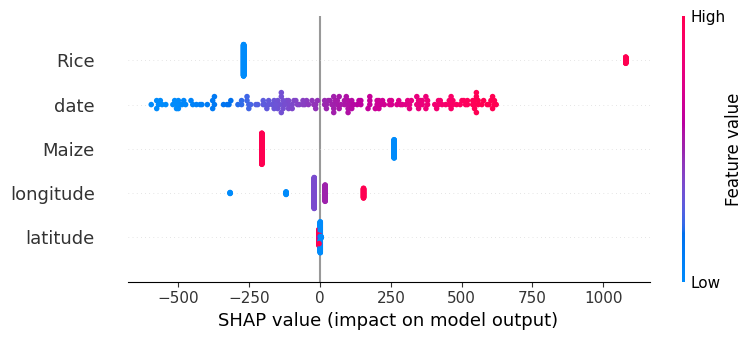

In [ ]:
#sumarry plot
shap.summary_plot(shap_values, X_test)


In [ ]:
shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0])





AttributeError: ignored



```
`# This is formatted as code`
```

KNNRegression

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
Knn = KNeighborsRegressor(n_neighbors=1)

In [ ]:
Knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=1)

In [ ]:
Pred =Knn.predict(X_test)

In [ ]:
Pred

array([ 430.77,  925.  ,  782.15, 3679.75, 1540.  , 2390.  , 1150.65,
       1370.  ,  821.15,  723.64, 1310.97, 1092.63,  222.75,  882.6 ,
       2167.36, 1055.7 ,  943.47,  605.34,  596.67, 1000.  , 1200.  ,
       2418.01,  937.5 ,  465.62,  395.99,  656.64,  804.12, 2860.49,
       3171.4 , 1134.14, 1033.33, 1235.24,  825.  ,  890.  ,  851.94,
        800.91,  741.38,  715.92,  813.22, 1080.89,  303.11, 1183.25,
       1235.24,  654.63, 1407.28,  742.32,  444.93,  903.33,  980.43,
        647.74,  810.  ,  514.29,  591.35,  683.57,  947.42,  465.62,
       3572.5 ,  465.62, 3343.03,  900.  ,  563.29,  563.29,  665.4 ,
        639.39,  430.77,  214.87,  757.24,  660.02,  699.55,  943.47,
        950.  ,  890.  , 1550.1 , 3282.12, 2400.  , 2860.49, 3503.96,
        829.48, 1450.  ,  587.67, 1180.71,  920.  , 1600.  ,  624.33,
        836.4 ,  658.57,  785.35, 2898.4 ,  383.26,  798.76, 1107.92,
       1190.  ,  498.39, 1270.  , 1183.25,  710.44,  254.69,  772.73,
        337.11, 1248

Evaluation of knnregressor model

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Compute the performance metrics of the KNN regression model
mse = mean_squared_error(y_test, Pred)

rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, Pred)
r2 = r2_score(y_test, Pred)

print(f"Mean squared error: {mse}")
print(f"Root mean squared error: {rmse}")
print(f"Mean absolute error: {mae}")
print(f"R-squared score: {r2}")

Mean squared error: 1254407.101851309
Root mean squared error: 1120.003170464847
Mean absolute error: 754.044712041885
R-squared score: -1.2061827441580077



random forest regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [ ]:
rf.fit(X_train, y_train)


RandomForestRegressor()

In [ ]:
y_pred_rf = rf.predict(X_test)
y_pred_rf

array([1496.9213,  705.628 ,  777.9892,  661.9279,  573.2933, 1139.1549,
       1079.1583, 2894.684 , 1048.3059,  401.8777,  400.7248, 1076.3756,
        961.4295,  979.8976,  735.779 ,  292.3594, 2829.0331,  989.1   ,
       1605.8241,  832.4311,  540.6046,  952.8915, 2707.1627,  559.7502,
        348.7985,  657.7521,  859.9772, 1041.7464,  787.8031,  288.4148,
        570.9801, 1173.2076, 1000.3   , 2712.4383,  233.4527,  724.6909,
       2610.673 ,  833.0512,  796.5748, 1152.7015, 1205.6406, 2887.3489,
       1189.6316, 1006.4   ,  389.8931,  830.0921,  440.6562, 2490.3715,
        249.8728,  767.7151,  881.5168,  553.5573,  656.109 ,  705.5971,
        899.6382,  977.225 , 1062.5401, 1403.8   ,  994.6723,  678.2292,
        545.3566,  573.8614, 2209.0472, 3685.8106,  280.4194,  300.6619,
        976.2901,  632.1914, 1587.625 ,  888.8218,  861.7391,  707.2039,
        542.9862,  832.1929, 1182.8678, 1078.4854, 1469.    ,  876.7412,
        983.9352,  616.3956, 1182.1088, 1389.7   , 

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")


RMSE: 90.74638393819102


In [ ]:
# tunig hyperparameters of the Random Forest Regressor using techniques such as grid search or randomized search.
from sklearn.model_selection import GridSearchCV

# Define a range of values for hyperparameters to search over
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a grid search object
grid = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search object to the training data
grid.fit(X_train, y_train)

# Print out the best hyperparameters and corresponding mean cross-validation score
print(f"Best hyperparameters: {grid.best_params_}")
print(f"Best cross-validation score: {-grid.best_score_}")


Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best cross-validation score: 13457.089537190888


In [ ]:
#best hyerarameters
# create a new instance of the RandomForestRegressor class with the best hyperparameters
rf1 = RandomForestRegressor(n_estimators=50, max_depth=None, min_samples_split=2)

# fit the model to your training data
rf1.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50)

In [ ]:
y_pred_rf1 = rf1.predict(X_test)


In [ ]:
# Compute the performance metrics of the RandomForestRegressor model
mse = mean_squared_error(y_test, y_pred_rf1)

rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,y_pred_rf1)
r2 = r2_score(y_test, y_pred_rf1)

print(f"Mean squared error: {mse}")
print(f"Root mean squared error: {rmse}")
print(f"Mean absolute error: {mae}")
print(f"R-squared score: {r2}")

Mean squared error: 8514.110444787222
Root mean squared error: 92.27193747173202
Mean absolute error: 58.58983979057588
R-squared score: 0.9850258472569047


Support vector regression

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [ ]:
# Scale the features using standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Define the parameter grid for the grid search
param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf']
}

In [ ]:
# Create the SVR model
svr = SVR()


In [ ]:
# Perform grid search with cross-validation
grid_search = GridSearchCV(svr, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

In [ ]:
# Get the best SVR model
best_svr = grid_search.best_estimator_

In [ ]:
# Make predictions on the test set
y_pred_SVR = best_svr.predict(X_test_scaled)
y_pred_SVR

In [ ]:
# Compute the performance metrics of the SVR model
mse = mean_squared_error(y_test, y_pred_SVR)

rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,y_pred_SVR)
r2 = r2_score(y_test, y_pred_SVR)

print(f"Mean squared error: {mse}")
print(f"Root mean squared error: {rmse}")
print(f"Mean absolute error: {mae}")
print(f"R-squared score: {r2}")

XGBOOST

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split


In [ ]:
# Create the XGBoost regressor
xgb_regressor = xgb.XGBRegressor()

In [ ]:
# Train the regressor on the training set
xgb_regressor.fit(X_train, y_train)


In [ ]:
# Make predictions on the testing set
y_pred_xgb = xgb_regressor.predict(X_test)

In [ ]:
# Compute the performance metrics of the XGBOOST model
mse = mean_squared_error(y_test, y_pred_xgb)

rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,y_pred_xgb)
r2 = r2_score(y_test, y_pred_xgb)

print(f"Mean squared error: {mse}")
print(f"Root mean squared error: {rmse}")
print(f"Mean absolute error: {mae}")
print(f"R-squared score: {r2}")

ELI5

In [ ]:
pip install eli5

In [ ]:
from eli5 import explain_weights, explain_prediction_xgboost
import eli5


In [ ]:
explain_weights(xgb_regressor)

In [ ]:
# Get a single sample from the test set
samp = X_test.iloc[0]
# Use eli5's explain_prediction to explain the prediction for the sample
explanation = eli5.explain_prediction_xgboost(xgb_regressor, samp)



In [ ]:
featuress=df_clean.columns[:-1]
df_clean.head()

In [ ]:
features = ['date','latitude','longitude','Maize','Rice'] # Replace with actual feature names
for sample in X_test:
    display(eli5.show_prediction(xgb_regressor, sample, show_feature_values=True, feature_names=features))





In [ ]:
# Print the explanation
print(explanation)

after model optimization

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# Create the XGBoost regressor
xgb_regressor1 = xgb.XGBRegressor()

In [ ]:
# Define a dictionary of hyperparameters and their values to search over
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001]
}

In [ ]:
# Perform grid search using cross-validation
grid_search = GridSearchCV(estimator=xgb_regressor1, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)


In [ ]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

In [ ]:
# Use the best estimator to make predictions on the testing set
best_regressor = grid_search.best_estimator_
y_pred_xgb1 = best_regressor.predict(X_test)


In [ ]:
# Compute the performance metrics of the XGBOOST1 model
mse = mean_squared_error(y_test, y_pred_xgb1)

rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,y_pred_xgb1)
r2 = r2_score(y_test, y_pred_xgb1)

print(f"Mean squared error: {mse}")
print(f"Root mean squared error: {rmse}")
print(f"Mean absolute error: {mae}")
print(f"R-squared score: {r2}")

LightGBM

In [ ]:
import lightgbm as lgb
# Create the LightGBM regressor
lgb_regressor = lgb.LGBMRegressor()

In [ ]:
# Train the regressor on the training set
lgb_regressor.fit(X_train, y_train)

In [ ]:
# Make predictions on the testing set
y_pred_lgbm = lgb_regressor.predict(X_test)

In [ ]:
# Compute the performance metrics of the LGBM model
mse = mean_squared_error(y_test, y_pred_lgbm)

rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,y_pred_lgbm)
r2 = r2_score(y_test, y_pred_lgbm)

print(f"Mean squared error: {mse}")
print(f"Root mean squared error: {rmse}")
print(f"Mean absolute error: {mae}")
print(f"R-squared score: {r2}")

CatBoost regressor

In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostRegressor

In [ ]:
# Create the CatBoostRegressor instance
m = CatBoostRegressor()
# Train the model
m.fit(X_train, y_train)


In [ ]:
# Make predictions on the test set
y_pred_catboost = m.predict(X_test)


In [ ]:
# Compute the performance metrics of the CATBOOST model
mse = mean_squared_error(y_test, y_pred_catboost)

rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,y_pred_catboost)
r2 = r2_score(y_test, y_pred_catboost)

print(f"Mean squared error: {mse}")
print(f"Root mean squared error: {rmse}")
print(f"Mean absolute error: {mae}")
print(f"R-squared score: {r2}")

hyperparameter tuning for CATBOOST

In [ ]:
from sklearn.model_selection import GridSearchCV
# Define the hyperparameters grid
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [4, 6, 8],
    'n_estimators': [100, 200, 300],
}

In [ ]:
# Create the CatBoostRegressor model
model = CatBoostRegressor()

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

In [ ]:
# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

In [ ]:
# retail price only
retail_df

In [ ]:
# dropping pricetype column
retail_df=retail_df.drop(columns=['pricetype'])

In [ ]:
# drop successful
retail_df

In [ ]:
# dropping category column
cereal_tuber_retail_df=retail_df.drop(columns='category')

In [ ]:
# drop successful
cereal_tuber_retail_df

In [ ]:
# checking contents of category column in retail_df
retail_df['category'].value_counts()

In [ ]:
# dataset containing retail price for only cereals and tubers
cereal_tuber_retail_df= retail_df[retail_df['category']== 'cereals and tubers'].reset_index(drop=True)

In [ ]:
# retail price for cereals and tubers only
cereal_tuber_retail_df

In [ ]:
# dropping category column
cereal_tuber_retail_df=cereal_tuber_retail_df.drop(columns='category')

In [ ]:
# drop successful
cereal_tuber_retail_df

In [ ]:
# checking the data types of all the columns
cereal_tuber_retail_df.info()

In [ ]:
# converting columns(latitude, longitude and price)from data type object to float
cereal_tuber_retail_df[['latitude', 'longitude', 'price']] = cereal_tuber_retail_df[['latitude', 'longitude', 'price']].astype(float)

In [ ]:
# converting date column from data type object to date_time
cereal_tuber_retail_df['date']=pd.to_datetime(cereal_tuber_retail_df['date'])

#converting datetime column to unix timestamps
cereal_tuber_retail_df['date'] = cereal_tuber_retail_df['date'].apply(lambda x: pd.Timestamp(x).timestamp())

#converting timestamps to dtype float
cereal_tuber_retail_df['date'] = cereal_tuber_retail_df['date'].astype(float)

In [ ]:
# checking the success of the conversion
cereal_tuber_retail_df.info()

In [ ]:
#converting commodity from object datatype to dummies which are suitable for machine learning algorithms
dummies = pd.get_dummies(cereal_tuber_retail_df.commodity)

#Putting each commodity dummies in its column
cereal_tuber_retail_df_dummies = pd.concat([cereal_tuber_retail_df, dummies], axis='columns')
cereal_tuber_retail_df_dummies.head()

In [ ]:
cereal_tuber_retail_df_dummies['commodity'].value_counts()

In [ ]:
#dropping columns(cassava flour and commodity):
#because of multi-collinearnity and datatype being object respectively
cereal_tuber_retail_df_dummies = cereal_tuber_retail_df_dummies.drop(['commodity', 'Cassava (fresh)'], axis=1)

In [ ]:
#Creating features and label datasets
retail_clean = cereal_tuber_retail_df_dummies
X = retail_clean.drop(['price'], axis=1)
y = retail_clean['price']

In [ ]:
# Splitting the dataset into training and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=10)

In [ ]:
# training the model
from sklearn.linear_model import LinearRegression
OLS = LinearRegression()

OLS.fit(X_train, y_train)

In [ ]:
# predictions made by the model
y_pred = OLS.predict(X_test)
performance = pd.DataFrame({'Actual Price': y_test, 'Commodity': X_test[['Cassava flour', 'Maize', 'Maize (white)' 'Maize flour', 'Millet flour', 'Millet', 'Sorghum']], 'Forecasted Price': y_pred})
performance.head()

In [ ]:
df.hist(figsize=(20, 10), bins=50)

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
df[['latitude', 'longitude']] = df[['latitude', 'longitude']].astype(float)

In [ ]:
print(df.dtypes)

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df['category'].value_counts()

In [ ]:
df['commodity'].value_counts()

In [ ]:
df[['date', 'commodity']].value_counts()

In [ ]:
df

In [ ]:
wholesale_df=df[df['pricetype']=='Wholesale'].reset_index(drop=True)
retail_df=df[df['pricetype']=='Retail'].reset_index(drop=True)

In [ ]:
wholesale_df=wholesale_df.drop(['pricetype'], axis=1)

In [ ]:
retail_df=retail_df.drop(columns=['pricetype'])

In [ ]:
cereals_tuber_wholesale_df=wholesale_df[wholesale_df['category']=='cereals and tubers'].reset_index(drop=True)
cereals_tuber_retail_df=retail_df[retail_df['category']=='cereals and tubers'].reset_index(drop=True)

In [ ]:
cereals_tuber_wholesale_df=cereals_tuber_wholesale_df.drop(columns=['category'])
cereals_tuber_retail_df=cereals_tuber_retail_df.drop(columns=['category'])

In [ ]:
cereals_tuber_wholesale_df

In [ ]:
cereals_tuber_retail_df

In [ ]:
cereals_tuber_wholesale_df['commodity'].value_counts()

In [ ]:
cereals_tuber_retail_df['commodity'].value_counts()

In [ ]:
wholesale_df['commodity'].value_counts()

In [ ]:
retail_df['category'].value_counts()

In [ ]:
df['pricetype'].value_counts()

In [ ]:
df.hist(figsize = (20,10), bins = 50)

In [ ]:
df.plot(kind='scatter', x='longitude', y='latitude')

In [ ]:
corr_matrix = df.corr()
corr_matrix['price'].sort_values(ascending = False)

In [ ]:
df[['retailprice', 'wholesaleprice']] = df['pricetype'].str.extract(r'retailprice: (\d+\.?\d*)\s+wholesaleprice: (\d+\.?\d*)')
df.info()

In [ ]:
dummies = pd.get_dummies(df.category, df.commodity, df.pricetype)
dummies

In [ ]:
df_dummies = pd.concat([df, dummies], axis='columns')
df_dummies.head()
df_clean=df_dummies.drop(['category', 'commodity', 'pricetype'], axis=1)
df_clean.head()

In [ ]:
df_clean.head()